In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
from tfIdfInheritVectorizer.feature_extraction.vectorizer import TFIDFVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [40]:
! curl https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv > fake_news.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.2M  100 29.2M    0     0  4036k      0  0:00:07  0:00:07 --:--:-- 4569k  0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [41]:
df = pd.read_csv("fake_news.csv")

In [42]:
df.head(3)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [43]:
df.shape

(6335, 4)

In [44]:
X = df['text'].values
y = df['label'].values


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [46]:
unique, counts = numpy.unique(y_train, return_counts=True)
print(f"distributioon for train dataset : {dict(zip(unique, counts))}")
unique, counts = numpy.unique(y_test, return_counts=True)
print(f"distributioon for test dataset : {dict(zip(unique, counts))}")

distributioon for train dataset : {'FAKE': 2120, 'REAL': 2124}
distributioon for test dataset : {'FAKE': 1044, 'REAL': 1047}


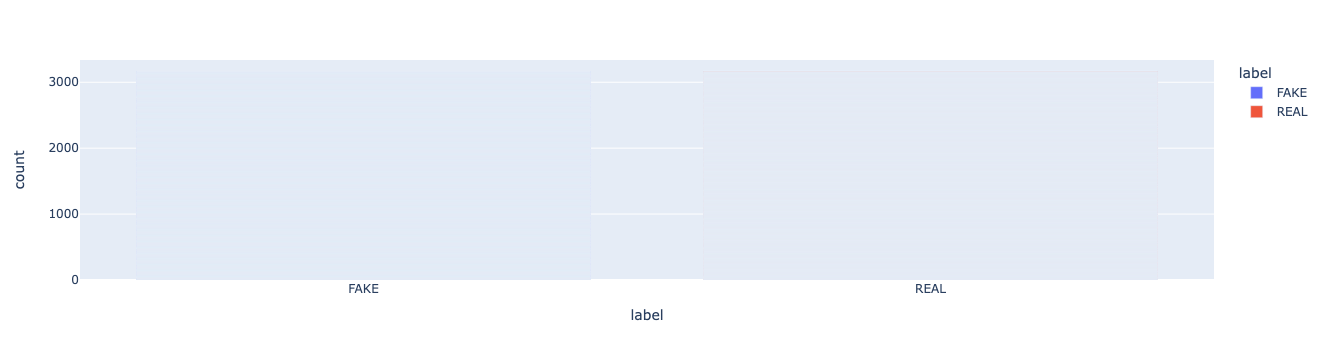

In [56]:
fig = px.bar(df, x='label', color='label')
fig.show()

In [10]:
vectorizer = TFIDFVectorizer()
train_tfidf = vectorizer.fit_transform(X_train)
test_tfidf = vectorizer.transform(X_test)


In [9]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)

In [10]:
clf.fit(train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=0)

In [11]:
clf.score(train_tfidf, y_train)

1.0

In [12]:
base_line = clf.score(test_tfidf, y_test)
base_line

0.9459588713534194

In [35]:
t_shape= train_tfidf.shape

In [31]:
def max_features_cals(max_features):
    vectorizer = TFIDFVectorizer(max_features=max_features)
    train_tfidf = vectorizer.fit_transform(X_train)
    test_tfidf = vectorizer.transform(X_test)
    clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
    clf.fit(train_tfidf, y_train)
    return clf.score(train_tfidf, y_train), clf.score(test_tfidf, y_test)
score_train_lst = []
score_test_lst = []
max_value = 2900
min_value = 1700
step_value = 50
for i in range(min_value,max_value, step_value):
    score_train, score_test = max_features_cals(i)
    score_test_lst.append(score_test)
    score_train_lst.append(score_train)
    print(i, score_train, score_test)

1700 1.0 0.9076996652319465
1750 1.0 0.9091343854615017
1800 1.0 0.9096126255380201
1850 1.0 0.9143950263032042
1900 1.0 0.9120038259206121
1950 1.0 0.9172644667623147
2000 1.0 0.9172644667623147
2050 1.0 0.9196556671449068
2100 1.0 0.9215686274509803
2150 1.0 0.9215686274509803
2200 1.0 0.9220468675274988
2250 1.0 0.921090387374462
2300 1.0 0.921090387374462
2350 1.0 0.921090387374462
2400 1.0 0.9215686274509803
2450 1.0 0.9191774270683883
2500 1.0 0.921090387374462
2550 1.0 0.9225251076040172
2600 1.0 0.9196556671449068
2650 1.0 0.9196556671449068
2700 1.0 0.9191774270683883
2750 1.0 0.9206121472979436
2800 1.0 0.9215686274509803
2850 1.0 0.9206121472979436


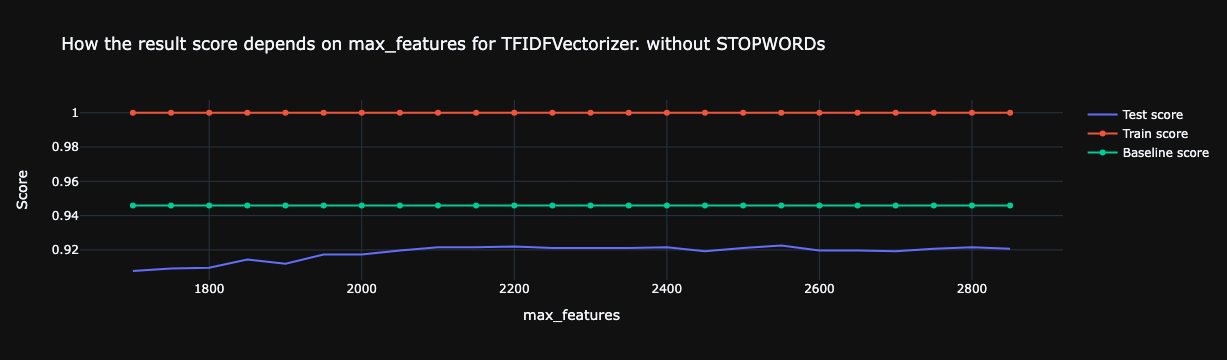

In [32]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_test_lst,
                    mode='lines',
                    name='Test score'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_train_lst,
                    mode='lines+markers',
                    name='Train score'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=[base_line]*100,
                    mode='lines+markers',
                    name='Baseline score'))

fig.update_layout(title='How the result score depends on max_features for TFIDFVectorizer. without STOPWORDs',
                   xaxis_title='max_features',
                   yaxis_title='Score')
fig.show()

In [47]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vyacheslav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
score_train_lst2 = []
score_test_lst2 = []
max_value = 2900
min_value = 1700
step_value = 50

In [24]:

def max_features_cals2(max_features):
    vectorizer = TFIDFVectorizer(max_features=max_features, stop_words=stops,
                                 # max_df=0.5,
                                 # min_df=5
                                 )
    train_tfidf = vectorizer.fit_transform(X_train)
    test_tfidf = vectorizer.transform(X_test)
    clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
    clf.fit(train_tfidf, y_train)
    return clf.score(train_tfidf, y_train), clf.score(test_tfidf, y_test)

for i in range(min_value,max_value, step_value):
    score_train, score_test = max_features_cals2(i)
    score_test_lst2.append(score_test)
    score_train_lst2.append(score_train)
    print(i, score_train, score_test)
    



1700 1.0 0.8971783835485414
1750 1.0 0.8971783835485414
1800 1.0 0.9005260640841702
1850 1.0 0.9005260640841702
1900 1.0 0.9029172644667623
1950 1.0 0.9024390243902439
2000 1.0 0.9033955045432808
2050 1.0 0.9086561453849833
2100 1.0 0.9062649450023912
2150 1.0 0.9062649450023912
2200 1.0 0.9053084648493543
2250 1.0 0.907221425155428
2300 1.0 0.9124820659971306
2350 1.0 0.9115255858440937
2400 1.0 0.912960306073649
2450 1.0 0.9110473457675753
2500 1.0 0.9096126255380201
2550 1.0 0.9124820659971306
2600 1.0 0.9110473457675753
2650 1.0 0.9143950263032042
2700 1.0 0.9153515064562411
2750 1.0 0.9139167862266858
2800 1.0 0.9120038259206121
2850 1.0 0.9134385461501674


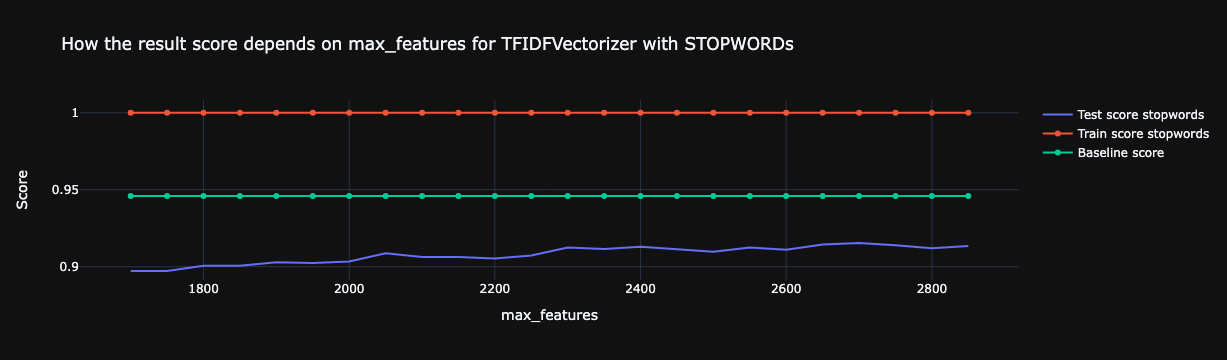

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_test_lst2,
                    mode='lines',
                    name='Test score stopwords'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_train_lst2,
                    mode='lines+markers',
                    name='Train score stopwords'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=[base_line]*(max_value-min_value),
                    mode='lines+markers',
                    name='Baseline score'))

fig.update_layout(title='How the result score depends on max_features for TFIDFVectorizer with STOPWORDs',
                   xaxis_title='max_features',
                   yaxis_title='Score')
fig.show()

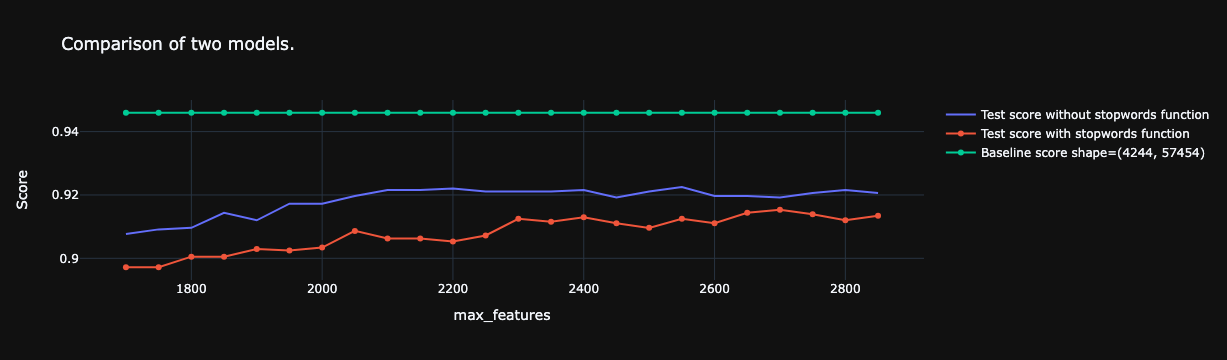

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_test_lst,
                    mode='lines',
                    name='Test score without stopwords function'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=score_test_lst2,
                    mode='lines+markers',
                    name='Test score with stopwords function'))
fig.add_trace(go.Scatter(x=list(range(min_value,max_value, step_value)), y=[base_line]*(max_value-min_value),
                    mode='lines+markers',
                    name=f'Baseline score shape={t_shape}'))

fig.update_layout(title='Comparison of two models.',
                   xaxis_title='max_features',
                   yaxis_title='Score')
fig.show()

In [1]:
from sklearn.manifold import TSNE

In [22]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(train_tfidf)
X_embedded.shape

(4244, 2)

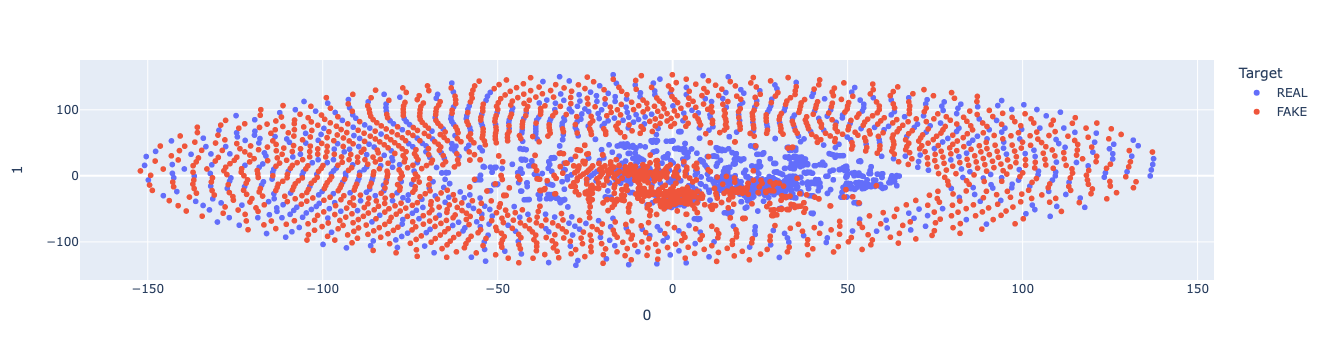

In [23]:
fig = px.scatter(
    X_embedded, x=0, y=1,
    color=y_train, labels={'color': 'Target'}
)
fig.show()

In [17]:
X_embedded3 = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(train_tfidf)
X_embedded3.shape

(4244, 3)

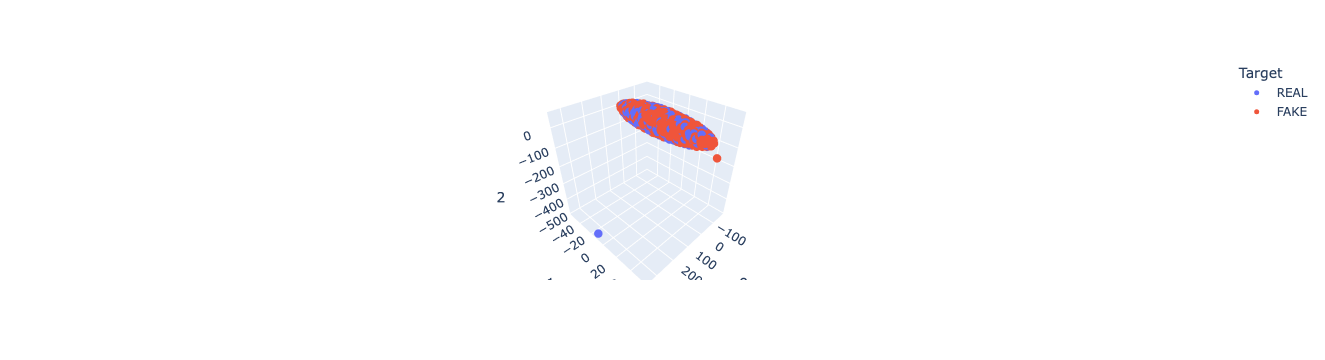

In [21]:
fig = px.scatter_3d(
    X_embedded3, x=0, y=1, z=2,
    color=y_train, labels={'color': 'Target'}
)
fig.update_traces(marker_size=5)
fig.show()

In [37]:
from sklearn.metrics import confusion_matrix

In [48]:
vectorizer = TFIDFVectorizer(max_features=2000, stop_words=stops,
                             # max_df=0.5,
                             # min_df=5
                             )
train_tfidf = vectorizer.fit_transform(X_train)
test_tfidf = vectorizer.transform(X_test)
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
clf.fit(train_tfidf, y_train)
y_train_pred = clf.predict(train_tfidf)
y_test_pred = clf.predict(test_tfidf)

In [ ]:
X_train, X_test, y_train, y_test

In [52]:
confusion_matrix(y_train, y_train_pred)

array([[2120,    0],
       [   0, 2124]])

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[943, 101],
       [101, 946]])

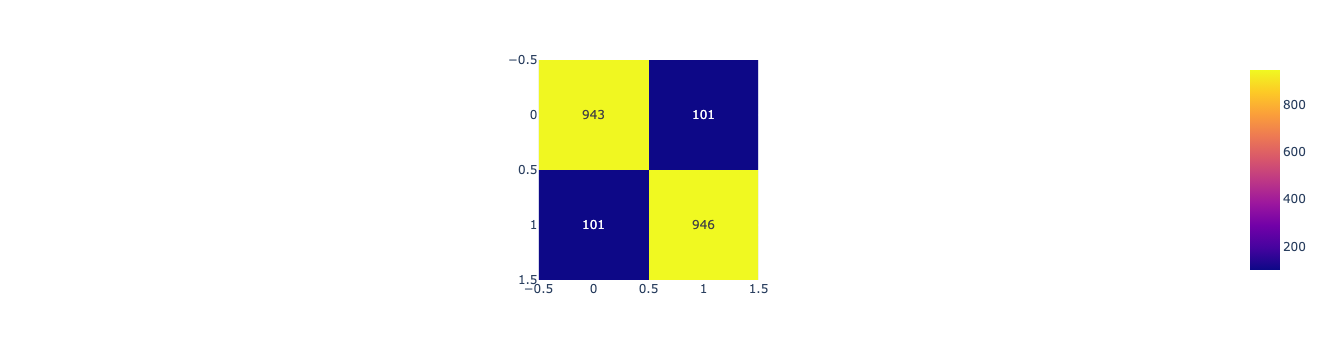

In [57]:
fig = px.imshow(confusion_matrix(y_test, y_test_pred), text_auto=True)
fig.show()

In [ ]:
y_test_pred = clf.predict(test_tfidf)